In [ ]:
import requests
import pandas as pd

# Liste des compteurs
counters = [
    "urn:ngsi-ld:EcoCounter:X2H25023006",
    "urn:ngsi-ld:EcoCounter:ZLT25011699",
    "urn:ngsi-ld:EcoCounter:COM24010120",
    "urn:ngsi-ld:EcoCounter:COM23120117",
    "urn:ngsi-ld:EcoCounter:X2H24042101",
    "urn:ngsi-ld:EcoCounter:COM23120110",
    "urn:ngsi-ld:EcoCounter:COM23120111",
    "urn:ngsi-ld:EcoCounter:COM23120114",
    "urn:ngsi-ld:EcoCounter:COM23120113",
    "urn:ngsi-ld:EcoCounter:COM23120112",
    "urn:ngsi-ld:EcoCounter:COM24010121",
    "urn:ngsi-ld:EcoCounter:COM24010119",
    "urn:ngsi-ld:EcoCounter:XTH24072390"
]

# Dates pour l'API (format ISO)
from_date = "2025-03-10T00:00:00"
to_date   = "2025-11-28T23:59:59"

all_data = []

for counter_id in counters:
    print(f" Récupération pour : {counter_id}")
    
    # 1️ Historique des séries temporelles
    url_series = f"https://portail-api-data.montpellier3m.fr/ecocounter_timeseries/{counter_id}/attrs/intensity"
    params = {"fromDate": from_date, "toDate": to_date}
    response = requests.get(url_series, params=params)
    
    if response.status_code == 200:
        data_series = response.json()
        df_series = pd.DataFrame({
            "datetime": data_series["index"],
            "intensity": data_series["values"]
        })
        df_series["counter_id"] = counter_id
    else:
        print(f"Erreur séries temporelles pour {counter_id} : {response.status_code}")
        continue

    # 2️ Description du compteur
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"][0], data_desc["location"]["value"]["coordinates"][1]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
        
        # Ajouter les colonnes statiques
        df_series["lat"] = lat
        df_series["lon"] = lon
        df_series["laneId"] = laneId
        df_series["vehicleType"] = vehicleType
    else:
        print(f"Erreur description pour {counter_id} : {response_desc.status_code}")
        df_series["lat"] = None
        df_series["lon"] = None
        df_series["laneId"] = None
        df_series["vehicleType"] = None

    all_data.append(df_series)
    print(f"{len(df_series)} lignes récupérées")

# 3️ Fusion finale
if all_data:
    df_all = pd.concat(all_data, ignore_index=True)
    df_all["datetime"] = pd.to_datetime(df_all["datetime"])
    
    # 4️ Sauvegarde CSV
    df_all.to_csv("../data/raw/ecocounters_full_complet.csv", index=False)
    print("\n CSV complet enregistré : ../data/raw/ecocounters_full_complet.csv")
else:
    print("Aucune donnée récupérée")


🔵 Récupération pour : urn:ngsi-ld:EcoCounter:X2H25023006
✅ 6286 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:ZLT25011699
✅ 2028 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010120
✅ 4157 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120117
✅ 3970 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:X2H24042101
✅ 6287 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120110
✅ 3984 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120111
✅ 4008 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120114
✅ 4056 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120113
✅ 4128 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM23120112
✅ 4224 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010121
✅ 186 lignes récupérées
🔵 Récupération pour : urn:ngsi-ld:EcoCounter:COM24010119
✅ 217 lignes récupérées
🔵 Récupération pou

In [20]:
df_all.groupby("counter_id")["datetime"].agg(["min", "max"])

,min,max
counter_id,,
urn:ngsi-ld:EcoCounter:COM23120110,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120111,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120112,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120113,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120114,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00
urn:ngsi-ld:EcoCounter:COM23120117,2025-06-17 01:00:00+00:00,2025-11-28 00:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010119,2025-11-01 05:30:00+00:00,2025-11-27 23:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010120,2025-06-17 01:00:00+00:00,2025-11-26 23:00:00+00:00
urn:ngsi-ld:EcoCounter:COM24010121,2025-10-31 05:30:00+00:00,2025-11-27 12:00:00+00:00


## 1️ Statistiques descriptives : (les statistiques globales et par compteur)
Moyenne, min, max, écart-type, etc. pour chaque compteur

In [21]:
# Statistiques globales
print("Statistiques globales sur l'intensité :")
print(df_all["intensity"].describe())

# Statistiques par compteur
stats_par_counter = df_all.groupby("counter_id")["intensity"].describe()
display(stats_par_counter)


Statistiques globales sur l'intensité :
count    49820.000000
mean        16.953954
std         28.047444
min          0.000000
25%          1.000000
50%          7.000000
75%         21.000000
max        346.000000
Name: intensity, dtype: float64


,count,mean,std,min,25%,50%,75%,max
counter_id,,,,,,,,
urn:ngsi-ld:EcoCounter:COM23120110,3984.0,2.820532,3.093516,0.0,0.0,2.0,4.00,20.0
urn:ngsi-ld:EcoCounter:COM23120111,4008.0,15.748004,18.653296,0.0,2.0,10.0,21.00,126.0
urn:ngsi-ld:EcoCounter:COM23120112,4224.0,11.068892,11.454457,0.0,2.0,8.0,17.00,75.0
urn:ngsi-ld:EcoCounter:COM23120113,4128.0,43.996851,41.251875,0.0,11.0,36.0,61.00,237.0
urn:ngsi-ld:EcoCounter:COM23120114,4056.0,50.177022,57.651115,0.0,8.0,34.0,66.00,346.0
urn:ngsi-ld:EcoCounter:COM23120117,3970.0,8.758942,9.733981,0.0,1.0,6.0,13.00,67.0
urn:ngsi-ld:EcoCounter:COM24010119,217.0,7.732719,7.660776,0.0,1.0,6.0,13.00,35.0
urn:ngsi-ld:EcoCounter:COM24010120,4157.0,14.404138,16.092079,0.0,1.0,9.0,24.00,111.0
urn:ngsi-ld:EcoCounter:COM24010121,186.0,61.844086,63.419942,0.0,7.0,50.0,82.75,269.0


## 2️ Calcul de la durée de collecte pour chaque compteur : 
**calculer le nombre de jours pour chaque compteur et créer des groupes selon tes critères :**

In [22]:
# Convertir datetime si ce n'est pas déjà fait
df_all["datetime"] = pd.to_datetime(df_all["datetime"])

# Calcul de la durée en jours pour chaque compteur
duration = df_all.groupby("counter_id")["datetime"].agg(["min", "max"])
duration["days"] = (duration["max"] - duration["min"]).dt.days + 1

# Ajouter une colonne catégorie
def categorize_counter(days):
    if days >= 200:
        return "plus de 200 jours"
    elif days >= 162:
        return "162 jours ou plus"
    elif days < 100:
        return "moins de 100 jours"
    else:
        return "autres"

duration["category"] = duration["days"].apply(categorize_counter)
display(duration)

,min,max,days,category
counter_id,,,,
urn:ngsi-ld:EcoCounter:COM23120110,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120111,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120112,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120113,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120114,2025-06-16 14:00:00+00:00,2025-11-27 13:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM23120117,2025-06-17 01:00:00+00:00,2025-11-28 00:00:00+00:00,164,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM24010119,2025-11-01 05:30:00+00:00,2025-11-27 23:00:00+00:00,27,moins de 100 jours
urn:ngsi-ld:EcoCounter:COM24010120,2025-06-17 01:00:00+00:00,2025-11-26 23:00:00+00:00,163,162 jours ou plus
urn:ngsi-ld:EcoCounter:COM24010121,2025-10-31 05:30:00+00:00,2025-11-27 12:00:00+00:00,28,moins de 100 jours


## 4️ Visualisation
#### a) Séries temporelles pour chaque compteur

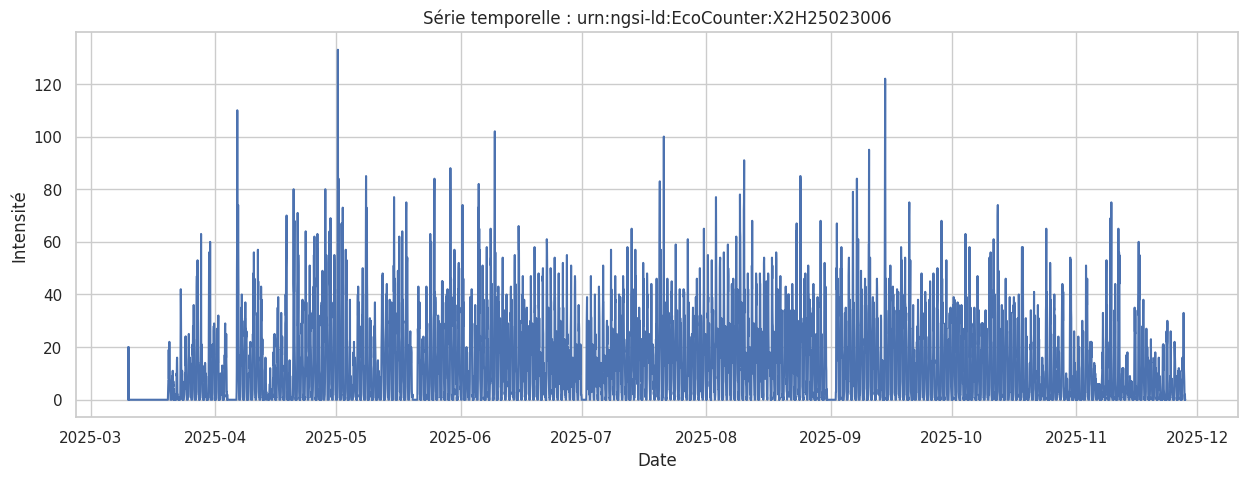

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Exemple pour un compteur
compteur = "urn:ngsi-ld:EcoCounter:X2H25023006"
df_plot = df_all[df_all["counter_id"] == compteur]

plt.figure(figsize=(15,5))
plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)
plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title(f"Série temporelle : {compteur}")
plt.show()

#### b) Comparer jours de semaine vs week-end

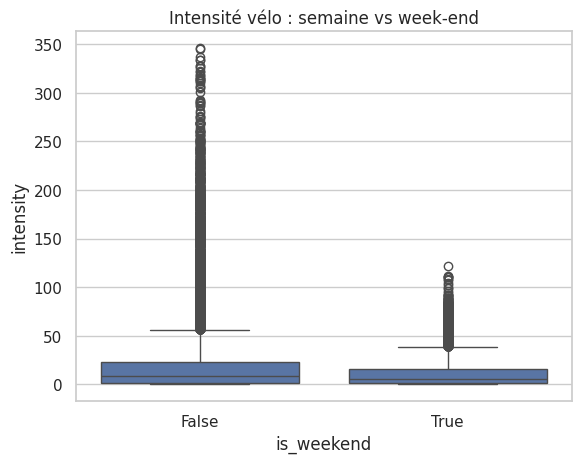

In [24]:
df_all["weekday"] = df_all["datetime"].dt.weekday  # 0 = lundi ... 6 = dimanche
df_all["is_weekend"] = df_all["weekday"].isin([5,6])

sns.boxplot(x="is_weekend", y="intensity", data=df_all)
plt.title("Intensité vélo : semaine vs week-end")
plt.show()

#### c) Heures de pointe

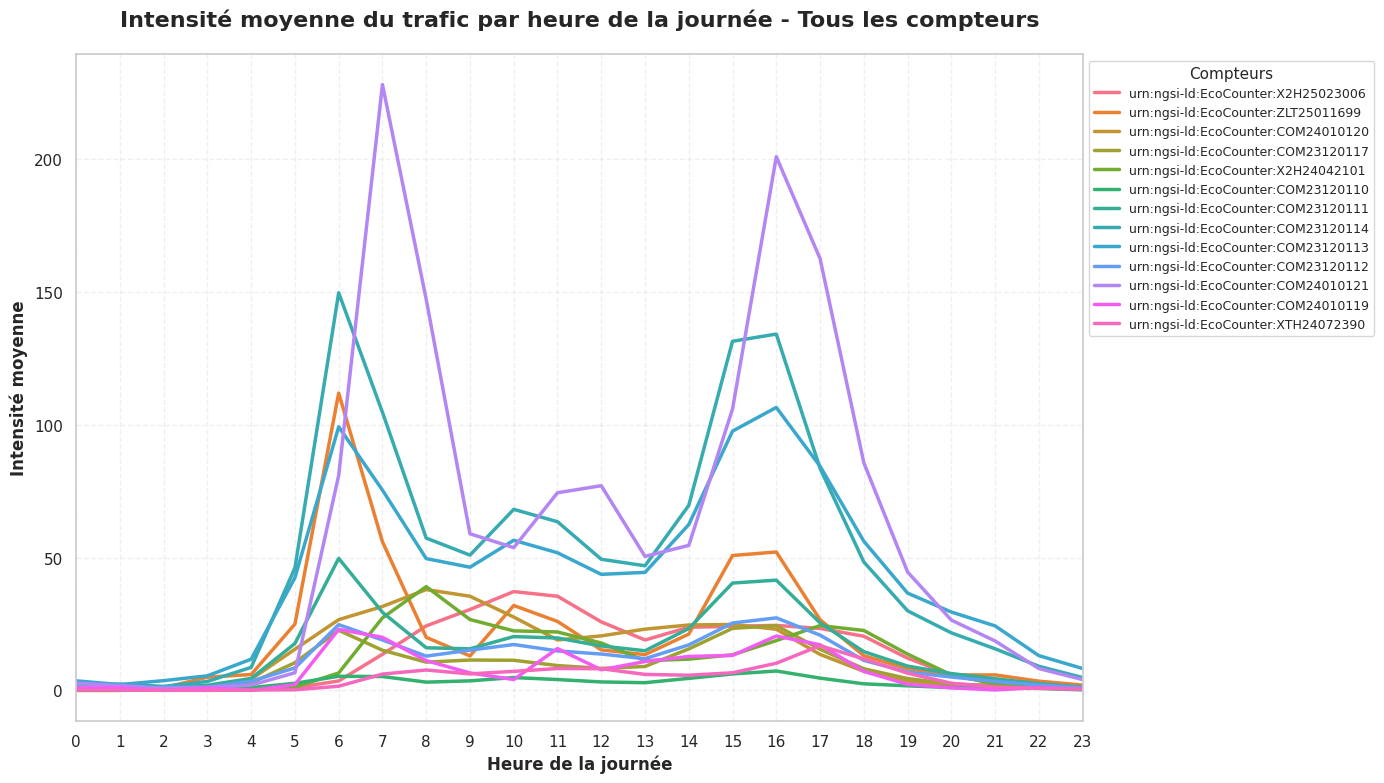

In [ ]:
# Configuration p
plt.figure(figsize=(14, 8))

# Création du graphique avec tous les compteurs
sns.lineplot(x="hour", y="intensity", hue="counter_id", data=df_all, 
        estimator="mean", errorbar=None, linewidth=2.5)

# titres et labels
plt.title("Intensité moyenne du trafic par heure de la journée - Tous les compteurs", 
        fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Heure de la journée", fontsize=12, fontweight='bold')
plt.ylabel("Intensité moyenne", fontsize=12, fontweight='bold')

# axes
plt.xticks(range(0, 24, 1))  # Toutes les heures
plt.xlim(0, 23)
plt.grid(True, alpha=0.3, linestyle='--')

# la légende pour tous les compteurs
plt.legend(title="Compteurs", title_fontsize=11, fontsize=9, 
        loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement du layout
plt.tight_layout()

plt.show()

### SYNTHÈSE DESCRIPTIVE DES COMPTEURS VÉLO MONTPELLIER: 
* PROFIL HORAIRE                                 

Nuit (0h-6h) : trafic minimal

6h-8h : montée progressive

8h-9h : pic matinal

9h-18h : plateau soutenu

17h-18h : PIC PRINCIPAL (soir)

19h+ : descente progressive
###
* CARACTÉRISTIQUES

Double pic urbain (matin/soir)

Pic du soir > pic matin

Stabilité 10h-16h

Forte variation entre compteurs

* TYPOLOGIE ZONE

Zone mixte résidentielle/professionnelle

Mouvements pendulaires marqués

Activité économique diurne

📈 POINTS CLÉS

Maximum : 250+ véhicules/heure

Heure critique : 17h-18h

Période creuse : 3h-5h

🎯 ACTIONS PRIORITAIRES

Optimiser gestion pointe du soir

Adapter infrastructures au double pic

Planifier travaux hors pointe

### CLASSEMENT DES COMPTEURS SELON LE TRAFIC ET PROFIL HORAIRE :

**um.ngsi-ld:EcGCounter-X2H25023006 : Fort trafic, pic soir >200**

um.ngsi-ld:EcGCounter-ZLT25021089 : Moyen, profil standard

**um.ngsi-ld:EcGCounter-COM24010120 : Élevé, double pic marqué**

um.ngsi-ld:EcGCounter-COM23120117 : Faible, stable

**um.ngsi-ld:EcGCounter-X2H24042101 : Très fort, leader >250**

um.ngsi-ld:EcGCounter-COM23120110 : Faible, régulier

um.ngsi-ld:EcGCounter-COM23120111 : Faible, constant

um.ngsi-ld:EcGCounter-COM23120114 : Moyen-faible

um.ngsi-ld:EcGCounter-COM23120113 : Faible, stable

um.ngsi-ld:EcGCounter-COM23120112 : Faible, régulier

um.ngsi-ld:EcGCounter-COM24010121 : Moyen, pic soir

um.ngsi-ld:EcGCounter-COM24010119 : Moyen, double pic

**um.ngsi-ld:EcGCounter-XTH24072390 : Fort, pic soir prononcé** 

**TOP 3 trafic : X2H24042101 > X2H25023006 > XTH24072390**

**Faible trafic : Tous COM2312011x**

**Pic soir dominant sur tous les compteurs**